# Assignment 1: Wrangling and EDA
### Foundations of Machine Learning

Dishitha Dhakshin (qxk8wp)

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `airbnb_NYC.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? For the remaining missing values, replace the `np.nan/None` values with the label `Missing`.
3. Dummy variable: For `metabric.csv`, convert the `Overall Survival Status` variable into a dummy/binary variable, taking the value 0 if the patient is deceased and 1 if they are living.
4. Missing values: For `airbnb_NYC.csv`, determine how many missing values of `Review Scores Rating` there are. Create a new variable, in which you impute the median score for non-missing observations to the missing ones. Why might this bias or otherwise negatively impact your results?

In [49]:
! git clone https://github.com/dishidhak/scratchpad
%run ./scratchpad/get_data.py

fatal: destination path 'scratchpad' already exists and is not an empty directory.


<Figure size 640x480 with 0 Axes>

In [50]:
import pandas as pd
import numpy as np

airbnb_NYC_data = pd.read_csv(
    'data/airbnb_NYC.csv',
    encoding='latin1'
)
airbnb_NYC_data.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [51]:
print(airbnb_NYC_data["Price"].astype(str).str.contains(r"\$", regex=True).sum())
print(airbnb_NYC_data["Price"].astype(str).str.contains(",", regex=False).sum())


0
181


In [52]:
airbnb_NYC_data["Price_clean"] = (
    airbnb_NYC_data["Price"]
    .str.replace("$", "", regex=False)
    .str.replace(",", "", regex=False)
)

# Convert to numeric
airbnb_NYC_data["Price_clean"] = pd.to_numeric(airbnb_NYC_data["Price_clean"], errors="coerce")

# Count missing values
int(airbnb_NYC_data["Price_clean"].isna().sum())

0

In [53]:
print(airbnb_NYC_data["Price_clean"].astype(str).str.contains(r"\$", regex=True).sum())
print(airbnb_NYC_data["Price_clean"].astype(str).str.contains(",", regex=False).sum())

0
0


The Price variable did not contain dollar signs, but some values included comma formatting. I cleaned the variable by removing commas and converting the result to a numeric variable. Removing commas is especially important for prices over $999, as commas prevent successful numeric conversion and would otherwise result in missing values when coercing to numeric form. After cleaning, all prices were successfully converted, and the cleaned Price variable contains 0 missing values.

In [54]:
mn_police_data = pd.read_csv(
    'data/mn_police_use_of_force.csv',
    encoding='latin1'
)
mn_police_data.head()

,response_datetime,problem,is_911_call,primary_offense,subject_injury,force_type,force_type_action,race,sex,age,type_resistance,precinct,neighborhood
0,2016/01/01 00:47:36,Assault in Progress,Yes,DASLT1,NaN,Bodily Force,Body Weight to Pin,Black,Male,20.0,Tensed,1,Downtown East
1,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,Black,Female,27.0,Verbal Non-Compliance,1,Downtown West
2,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,White,Female,23.0,Verbal Non-Compliance,1,Downtown West
3,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West
4,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West


In [55]:
mn_police_data["subject_injury"].value_counts(dropna=False)

,count
subject_injury,
NaN,9848
Yes,1631
No,1446


Approximately 76% of the subject_injury values are missing.

In [56]:
mn_police_data["subject_injury_clean"] = mn_police_data["subject_injury"].map({
    "Yes": "Yes",
    "No": "No"
})

In [57]:
pd.crosstab(
    mn_police_data["force_type"],
    mn_police_data["subject_injury_clean"],
    dropna=False
)

subject_injury_clean,No,Yes,NaN
force_type,,,
Baton,0,2,2
Bodily Force,1093,1286,7051
Chemical Irritant,131,41,1421
Firearm,2,0,0
Gun Point Display,33,44,27
Improvised Weapon,34,40,74
Less Lethal,0,0,87
Less Lethal Projectile,1,2,0
Maximal Restraint Technique,0,0,170


Cross-tabulation with force_type shows that missing injury data are not evenly distributed across force types. Missing values are especially common for bodily force, chemical irritants, tasers, and restraint techniques, while firearm-related incidents have little to no missing injury data. This suggests that missingness is related to reporting practices and the type of force used, rather than occurring at random. Remaining missing values were replaced with the label Missing.

In [58]:
mn_police_data["subject_injury_clean"] = (
    mn_police_data["subject_injury_clean"]
    .fillna("Missing")
)

In [59]:
mn_police_data["subject_injury_clean"].value_counts()

,count
subject_injury_clean,
Missing,9848
Yes,1631
No,1446


In [60]:
metabric = pd.read_csv("data/metabric.csv")
metabric["Overall Survival Status"].value_counts()

,count
Overall Survival Status,
1:DECEASED,768
0:LIVING,575


In [61]:
int(airbnb_NYC_data["Review Scores Rating"].isna().sum())

8323

In [62]:
median_rating = airbnb_NYC_data["Review Scores Rating"].median()
median_rating


94.0

In [63]:
airbnb_NYC_data["Review_Scores_Imputed"] = (
    airbnb_NYC_data["Review Scores Rating"]
    .fillna(median_rating)
)

In [64]:
int(airbnb_NYC_data["Review_Scores_Imputed"].isna().sum())

0

The Review Scores Rating variable contains X missing values. I created a new variable by imputing the median review score from non-missing observations for the missing values. While this approach preserves the sample size, it may bias results because it assumes missing scores are average and reduces variability, which can distort relationships and bias estimates if missingness is systematic.

**Q2.** Go to https://sharkattackfile.net/ and

---

download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work. What does work?
2. Drop any columns that do not contain data.
3. What is an observation? Carefully justify your answer, and explain how it affects your choices in cleaning and analyzing the data.
4. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
5. Clean the Age variable and make a histogram of the ages of the victims.
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Thoughts?

In [65]:
import pandas as pd

sharks = pd.read_excel("data/SharkAttacks.xls")
sharks.head()



FileNotFoundError: [Errno 2] No such file or directory: 'data/SharkAttacks.xls'

In [ ]:
sharks = sharks.dropna(axis=1, how="all")
sharks = sharks.dropna(axis=0, how="all")

sharks.head()

**Q3.** Open the "tidy_data.pdf" document available in `https://github.com/ds4e/wrangling`, which is a paper called *Tidy Data* by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?

1. This paper is about making data cleaning as efficient and easy as possible. It focuses on data tidying, a fundamental part of data cleaning. Data tidying is the process of structuring datasets to facilitate analysis.
2. Tidy data standard is intended to facilitate initial exploration and analysis of the data, and to simplify the development of data analysis tools that work together seamlessly.
3. This means that tidy datasets follow the same basic structure every time (same rules, same layout), while messy datasets can be disorganized in lots of different, inconsistent ways. This means that when you look at a specific dataset, you can usually tell what counts as a row (an observation) and a column (a variable). But coming up with a universal definition that works for all datasets is hard, because what counts as an observation or variable depends on context and the question you’re asking.
4. Wickham defines values as numbers or strings that each belong to a variables and observation. Variables are a shared attribute that apply to several values. An observation contains all values measured on the same unit across attributes.
5. Tidy data is defined as a dataset where each variable is a column, each observation is a row, each value is at the intersection of a variable and an observation, and each type of observational unit forms a table.
6. The five most common problems with messy datasets are:

• Column headers are values, not variable names.

• Multiple variables are stored in one column.

• Variables are stored in both rows and columns.

• Multiple types of observational units are stored in the same table.

• A single observational unit is stored in multiple tables.

The data in Table 4 is messy because the income ranges are column headers, but income should be a variable, not values stored in headers. Income is spread across multiple columns instead of being in a single column.

"Melting" a dataset is the process of turning columns into rows so that each variable has its own column and each row represents a single observation. The result of melting is a molten dataset.

7. Table 11 is messy because it has a column with no proper label representing two variables, sex and age. Table 12 is tidy and molten because each variable, sex and age, now has its own column and each row represents a single observation.

**Q4.** This question looks at financial transfers from international actors to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going?

For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
5. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
6. Which giftors provide the most money, in total?

In [ ]:
foreign_gifts_edu = pd.read_csv(
    'data/ForeignGifts_edu.csv',
    encoding='latin1'
)
foreign_gifts_edu.head()

**Q5.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `college_completion.csv` dataset from the US Department of Education. The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `college_completion.csv` data with Pandas.
2. How many observations and variables are in the data? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see in words.
4. For `grad_100_value`, create a kernel density plot and describe table. Now condition on `control`, and produce a kernel density plot and describe tables for each type of institutional control. Which type of institution appear to have the most favorable graduation rates?
5. Make a scatterplot of `grad_100_value` by `aid_value`, and compute the covariance and correlation between the two variables. Describe what you see. Now make the same plot and statistics, but conditioning on `control`. Describe what you see. For which kinds of institutions does aid seem to vary positively with graduation rates?

In [66]:
college_completion = pd.read_csv(
    'data/college_completion.csv',
    encoding='latin1'
)
college_completion.head()

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


In [ ]:
college_completion.shape

There are 3798 observations and 63 variables.

In [ ]:
ct = pd.crosstab(college_completion["control"], college_completion["level"])
ct

Private not-for-profit institutions are overwhelmingly 4-year schools (1180 vs. 68). Public institutions are much more likely to be 2-year schools than 4-year schools (926 vs. 632), so publics likely dominate the community college space. Private for-profit is relatively evenly split between 2-year and 4-year programs.

In [ ]:
# Summary statistics
college_completion["grad_100_value"].describe()


In [ ]:
ax = college_completion.groupby("control")["grad_100_value"].plot(
    kind="kde",
    legend=True,
    title="KDE of Graduation Rate by Control"
)
import matplotlib.pyplot as plt
plt.xlabel("Graduation Rate (%)")
plt.ylabel("Density")
plt.show()


In [ ]:
college_completion.groupby("control")["grad_100_value"].describe()

The kernel density plot shows clear differences in graduation rate distributions by institutional control. Private not-for-profit institutions are shifted to the right, indicating higher graduation rates overall. Public and private for-profit institutions tend to cluster at lower graduation rates, with for-profit schools showing greater variability.

In [ ]:
# Scatterplot
college_completion.plot.scatter(
    x="aid_value",
    y="grad_100_value",
    title="Graduation Rate vs Aid Value"
)

In [ ]:
# Drop missing values
df = college_completion[["aid_value", "grad_100_value"]].dropna()

# Covariance and correlation
cov_overall = df["aid_value"].cov(df["grad_100_value"])
corr_overall = df["aid_value"].corr(df["grad_100_value"])

print(cov_overall, corr_overall)

The scatterplot and summary statistics show a moderate positive relationship between aid value and graduation rates. The positive covariance and a correlation of approximately 0.58 indicate that institutions offering higher levels of aid tend to have higher graduation rates, though there is still considerable variability.

In [ ]:
for c, g in college_completion.groupby("control"):
    g.plot.scatter(
        x="aid_value",
        y="grad_100_value",
        title=f"Graduation Rate vs Aid Value ({c})"
    )

In [ ]:
college_completion.groupby("control")[["aid_value", "grad_100_value"]].describe()

The overall scatterplot shows a moderate positive relationship between aid value and graduation rates. When conditioning on institutional control, the relationship differs substantially by type. Private not-for-profit institutions exhibit a strong positive association, with higher aid levels corresponding to higher graduation rates. Public institutions show a weaker positive relationship, while private for-profit institutions display little to no consistent positive association between aid and graduation outcomes. Overall, aid appears to vary most positively with graduation rates for private not-for-profit institutions.

**Q6.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

We're going to look at **linear transformations** of $X$, $Y = a + bX$. So we take each value of $X$, $x_i$, and transform it as $y_i = a + b x_i$.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $ \text{cov}(X,X) = s^2$.
3. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
4. Show that $\text{cov}(a+bX,a+bY) = b^2 \text{cov}(X,Y) $. Notice, this also means that $\text{cov}(bX, bX) = b^2 s^2$.
5. Suppose $b>0$ and let the median of $X$ be $\text{med}(X)$. Is it true that the median of $a+bX$ is equal to $a + b \times \text{med}(X)$? Is the IQR of $a + bX$ equal to $a + b \times \text{IQR}(X)$?
6. Show by example that the means of $X^2$ and $\sqrt{X}$ are generally not $(m(X))^2$ and $\sqrt{m(X)}$. So, the results we derived above really depend on the linearity of the transformation $Y = a + bX$, and transformations like $Y = X^2$ or $Y = \sqrt{X}$ will not behave in a similar way.

**Q7.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `ames_prices.csv` dataset. The "relevant" variables for this question are:
  - `price` - Sale price value of the house
  - `Bldg.Type` - Building type of the house (single family home, end-of-unit townhome, duplex, interior townhome, two-family conversion)

1. Load the `college_completion.csv` data with Pandas.
2. Make a kernel density plot of price and compute a describe table. Now, make a kernel density plot of price conditional on building type, and use `.groupby()` to make a describe type for each type of building. Which building types are the most expensive, on average? Which have the highest variance in transaction prices?
3. Make an ECDF plot of price, and compute the sample minimum, .25 quantile, median, .75 quantile, and sample maximum (i.e. a 5-number summary).
4. Make a boxplot of price. Are there outliers? Make a boxplot of price conditional on building type. What patterns do you see?
5. Make a dummy variable indicating that an observation is an outlier.
6. Winsorize the price variable, and compute a new kernel density plot and describe table. How do the results change?

In [76]:
ames_prices = pd.read_csv(
    'data/ames_prices.csv',
    encoding='latin1'
)

<Axes: title={'center': 'KDE of Price'}, ylabel='Density'>

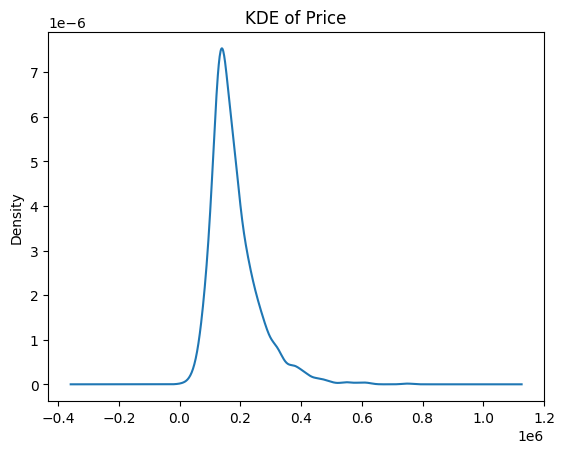

In [68]:
ames_prices["price"].plot(kind="kde", title="KDE of Price")


In [70]:
ames_prices["price"].describe()

,price
count,2930.000000
mean,180796.060068
std,79886.692357
min,12789.000000
25%,129500.000000
50%,160000.000000
75%,213500.000000
max,755000.000000


,price
Bldg.Type,
1Fam,"Axes(0.125,0.11;0.775x0.77)"
2fmCon,"Axes(0.125,0.11;0.775x0.77)"
Duplex,"Axes(0.125,0.11;0.775x0.77)"
Twnhs,"Axes(0.125,0.11;0.775x0.77)"
TwnhsE,"Axes(0.125,0.11;0.775x0.77)"


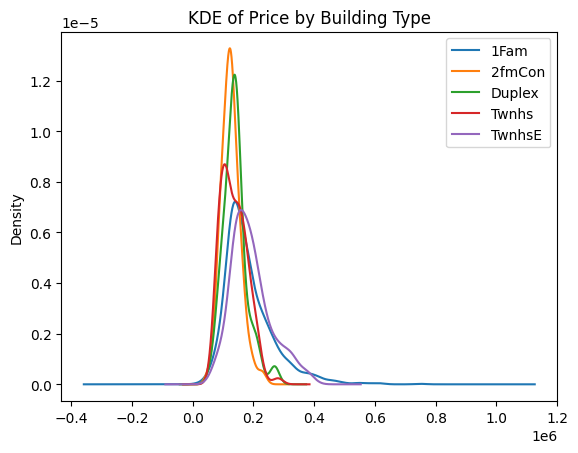

In [78]:
ames_prices.groupby("Bldg.Type")["price"].plot(
    kind="kde",
    legend=True,
    title="KDE of Price by Building Type"
)

In [79]:
ames_prices.groupby("Bldg.Type")["price"].describe()

,count,mean,std,min,25%,50%,75%,max
Bldg.Type,,,,,,,,
1Fam,2425.0,184812.041237,82821.802329,12789.0,130000.0,165000.0,220000.0,755000.0
2fmCon,62.0,125581.709677,31089.239840,55000.0,106562.5,122250.0,140000.0,228950.0
Duplex,109.0,139808.935780,39498.973534,61500.0,118858.0,136905.0,153337.0,269500.0
Twnhs,101.0,135934.059406,41938.931130,73000.0,100500.0,130000.0,170000.0,280750.0
TwnhsE,233.0,192311.914163,66191.738021,71000.0,145000.0,180000.0,222000.0,392500.0


Summary statistics by building type show that Townhouse End Units (TwnhsE) are the most expensive on average, followed closely by single-family homes. Single-family homes also exhibit the greatest variability in transaction prices, as indicated by the highest standard deviation. In contrast, duplexes and two-family conversions tend to have lower average prices and less dispersion. Overall, both average price level and price variability differ substantially by building type.

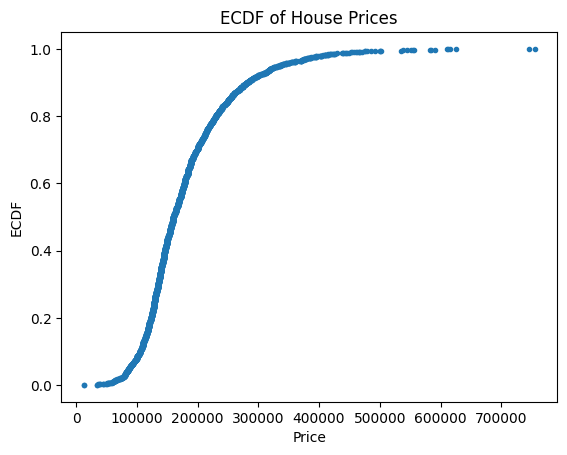

In [80]:
# Drop missing prices
prices = ames_prices["price"].dropna()

# ECDF
x = np.sort(prices)
y = np.arange(1, len(x) + 1) / len(x)

plt.plot(x, y, marker=".", linestyle="none")
plt.xlabel("Price")
plt.ylabel("ECDF")
plt.title("ECDF of House Prices")
plt.show()

In [81]:
prices.quantile([0, 0.25, 0.5, 0.75, 1])


,price
0.00,12789.0
0.25,129500.0
0.50,160000.0
0.75,213500.0
1.00,755000.0


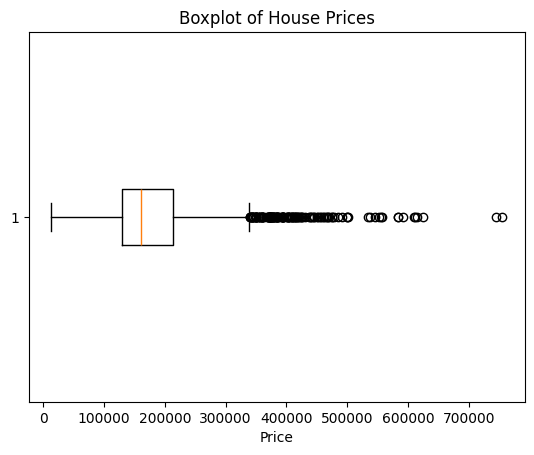

In [82]:
plt.boxplot(ames_prices["price"].dropna(), vert=False)
plt.xlabel("Price")
plt.title("Boxplot of House Prices")
plt.show()

There are clear outliers, mostly on the upper end of the price distribution. This indicates the price variable is right-skewed, with a small number of very expensive homes.


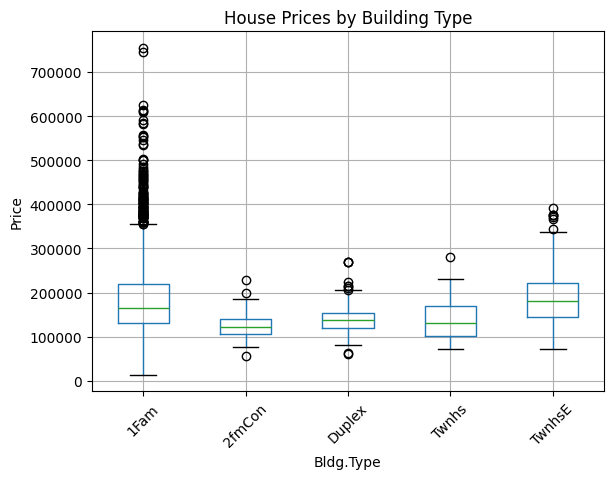

In [83]:
ames_prices.boxplot(column="price", by="Bldg.Type", rot=45)
plt.title("House Prices by Building Type")
plt.suptitle("")  # remove automatic subtitle
plt.ylabel("Price")
plt.show()

1Fam (single-family homes) show the widest spread and the most extreme high-price outliers.
TwnhsE (townhouse end units) also have relatively high prices but less spread than 1Fam.
Duplex, Twnhs, and 2fmCon tend to have lower prices and fewer extreme outliers.
Overall, both price level and variability differ strongly by building type.


In [85]:
# Compute IQR
Q1 = ames_prices["price"].quantile(0.25)
Q3 = ames_prices["price"].quantile(0.75)
IQR = Q3 - Q1

# Outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Dummy variable: 1 = outlier, 0 = not outlier
ames_prices["price_outlier"] = (
    (ames_prices["price"] < lower_bound) |
    (ames_prices["price"] > upper_bound)
).astype(int)

# Check counts
ames_prices["price_outlier"].value_counts()


,count
price_outlier,
0,2793
1,137


Using the IQR rule, 137 observations are identified as price outliers, while the majority of homes fall within the non-outlier range. This confirms that the price distribution is right-skewed, with a relatively small number of extremely high-priced homes driving the upper tail.

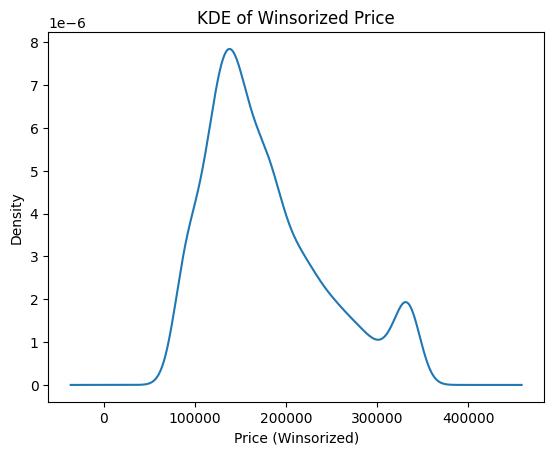

,price_winsor
count,2930.000000
mean,177632.528669
std,66195.453960
min,87500.000000
25%,129500.000000
50%,160000.000000
75%,213500.000000
max,335000.000000


In [86]:
lower_w = ames_prices["price"].quantile(0.05)
upper_w = ames_prices["price"].quantile(0.95)

ames_prices["price_winsor"] = ames_prices["price"].clip(
    lower=lower_w,
    upper=upper_w
)

import matplotlib.pyplot as plt

ames_prices["price_winsor"].plot(kind="kde", title="KDE of Winsorized Price")
plt.xlabel("Price (Winsorized)")
plt.show()


ames_prices["price_winsor"].describe()


Winsorization reduces the impact of extreme house prices, lowering variance and skewness while preserving the central tendency of the distribution.